Import des librairies

In [2]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
import seaborn as sns
from datetime import datetime

Récupérer les données avec Alpha Vintage

In [3]:
apikey = "270E1RIWIZ5ZK8A2"

# Liste des actifs à analyser avec leurs symboles Alpha Vantage
actifs = {
    "Bitcoin": "BTCUSD",  # Bitcoin en dollars
    "Or": "XAUUSD",  # Prix de l'or en dollars
    "S&P 500": "SPY"  # ETF du S&P 500
}

# Dictionnaire pour stocker les données
resultats = {}

for nom, symbole in actifs.items():
    # Requête API pour récupérer les données mensuelles
    url = f"https://www.alphavantage.co/query?function=TIME_SERIES_MONTHLY&symbol={symbole}&apikey={apikey}"
    r = requests.get(url)
    data = r.json()

    # Extract des données
    time_series = data.get("Monthly Time Series", {})

    # Transf les données en DataFrame
    df = pd.DataFrame.from_dict(time_series, orient="index")

    # Renommer les colonnes en français
    df.columns = ["Ouverture", "Haut", "Bas", "Clôture", "Volume"]

    # Convertir l'index en datetime
    df.index = pd.to_datetime(df.index)

    # Ajouter des colonnes "Année" et "Mois"
    df["Année"] = df.index.year
    df["Mois"] = df.index.month

    # Filtrer les données pour les 4 dernières années
    df = df[df.index >= "2020-01-01"]

    # Trier par date (du plus ancien au plus récent)
    df = df.sort_index()

    df = df[["Année", "Mois", "Ouverture", "Haut", "Bas", "Clôture", "Volume"]]

    # Stocker dans le dict
    resultats[nom] = df

    # Sauvegarde en CSV
    df.to_csv(f"{nom}_5_ans_par_mois.csv", index=False)

# Afficher un exemple de résultat pour Bitcoin
print(resultats["Bitcoin"])

            Année  Mois    Ouverture         Haut         Bas      Clôture  \
2020-01-31   2020     1    7190.6005    9574.4994   6870.7240    9350.8328   
2020-02-29   2020     2    9350.4719   10503.1782   8440.7014    8525.9295   
2020-03-31   2020     3    8527.1303    9195.2664   3836.9059    6413.0223   
2020-04-30   2020     4    6415.3477    9461.1138   6153.4737    8623.0469   
2020-05-31   2020     5    8621.6808   10067.3335   8125.3912    9448.1873   
...           ...   ...          ...          ...         ...          ...   
2024-10-31   2024    10   63317.1173   73611.7879  58919.4223   70205.1188   
2024-11-30   2024    11   70203.7695   99815.8387  66791.8510   96464.5682   
2024-12-31   2024    12   96469.4654  108353.1197  91312.4134   93390.5555   
2025-01-31   2025     1   93376.2698  109349.9753  89116.8579  102409.6846   
2025-02-11   2025     2  102415.4928  102773.0727  10000.0000   98036.8323   

             Volume  
2020-01-31  2343316  
2020-02-29  2318820

Pre-processing des données

In [18]:
# Charger les fichiers CSV
bitcoin = pd.read_csv("Bitcoin_5_ans_par_mois.csv")
gold = pd.read_csv("Or_5_ans_par_mois.csv")
sp500 = pd.read_csv("S&P 500_5_ans_par_mois.csv")

# Ajouter une colonne "Actif" pour identifier les données
bitcoin["Actif"] = "Bitcoin"
gold["Actif"] = "Or"
sp500["Actif"] = "S&P 500"

# Fusionner toutes les données en un seul DataFrame
df_total = pd.concat([bitcoin, gold, sp500])
print(df_total.head())

# Vérification des types de données
print("\n Types de données :")
print(df_total.dtypes)

# Vérification des données manquantes
print("\n Données manquantes :")
print(df_total.isnull().sum())

# Vérification des doublons
print("\n Nombre de doublons :")
print(df_total.duplicated().sum())

# Affichage des doublons s'ils existent
if df_total.duplicated().sum() > 0:
    print("\n Doublons trouvés :")
    print(df_total[df_total.duplicated()])



   Année  Mois  Ouverture        Haut        Bas    Clôture   Volume    Actif
0   2020     1  7190.6005   9574.4994  6870.7240  9350.8328  2343316  Bitcoin
1   2020     2  9350.4719  10503.1782  8440.7014  8525.9295  2318820  Bitcoin
2   2020     3  8527.1303   9195.2664  3836.9059  6413.0223  5955546  Bitcoin
3   2020     4  6415.3477   9461.1138  6153.4737  8623.0469  3525791  Bitcoin
4   2020     5  8621.6808  10067.3335  8125.3912  9448.1873  3749452  Bitcoin

 Types de données :
Année          int64
Mois           int64
Ouverture    float64
Haut         float64
Bas          float64
Clôture      float64
Volume         int64
Actif         object
dtype: object

 Données manquantes :
Année        0
Mois         0
Ouverture    0
Haut         0
Bas          0
Clôture      0
Volume       0
Actif        0
dtype: int64

 Nombre de doublons :
0


Analyse exploratoire des données

In [19]:
print("Statistiques Bitcoin :\n", bitcoin.describe(), "\n")
print("Statistiques Or :\n", gold.describe(), "\n")
print("Statistiques S&P 500 :\n", sp500.describe(), "\n")

Statistiques Bitcoin :
              Année       Mois      Ouverture           Haut           Bas  \
count    62.000000  62.000000      62.000000      62.000000     62.000000   
mean   2022.096774   6.338710   37515.847037   43553.586400  31649.983465   
std       1.500925   3.538748   22939.301803   25916.639273  19479.851809   
min    2020.000000   1.000000    6415.347700    9195.266400   3836.905900   
25%    2021.000000   3.000000   19902.849800   24141.486425  17585.686925   
50%    2022.000000   6.000000   33880.945000   40654.171150  28754.608850   
75%    2023.000000   9.000000   54492.534800   63486.403500  42928.794775   
max    2025.000000  12.000000  102415.492800  109349.975300  91312.413400   

             Clôture        Volume  
count      62.000000  6.200000e+01  
mean    38981.611584  2.631488e+06  
std     23854.168387  2.778685e+06  
min      6413.022300  1.499740e+05  
25%     20160.187725  5.472108e+05  
50%     34853.220550  1.800994e+06  
75%     57525.764900  3

Actif
Bitcoin    32022.693958
Or           446.083024
S&P 500      101.629237
dtype: float64


/tmp/ipykernel_127481/3535585986.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ecart_type.index, y=ecart_type.values, palette="coolwarm")


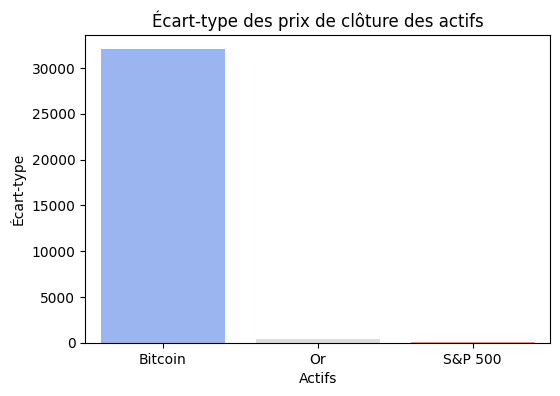

In [20]:
# Créer la table pivot avec les prix de clôture par actif
df_pivot = df_total.pivot_table(index='Année', columns='Actif', values='Clôture', aggfunc='mean')

# Calculer l'écart-type pour chaque actif
ecart_type = df_pivot.std()

# Afficher les résultats
print(ecart_type)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.barplot(x=ecart_type.index, y=ecart_type.values, palette="coolwarm")
plt.title("Écart-type des prix de clôture des actifs")
plt.ylabel("Écart-type")
plt.xlabel("Actifs")
plt.show()

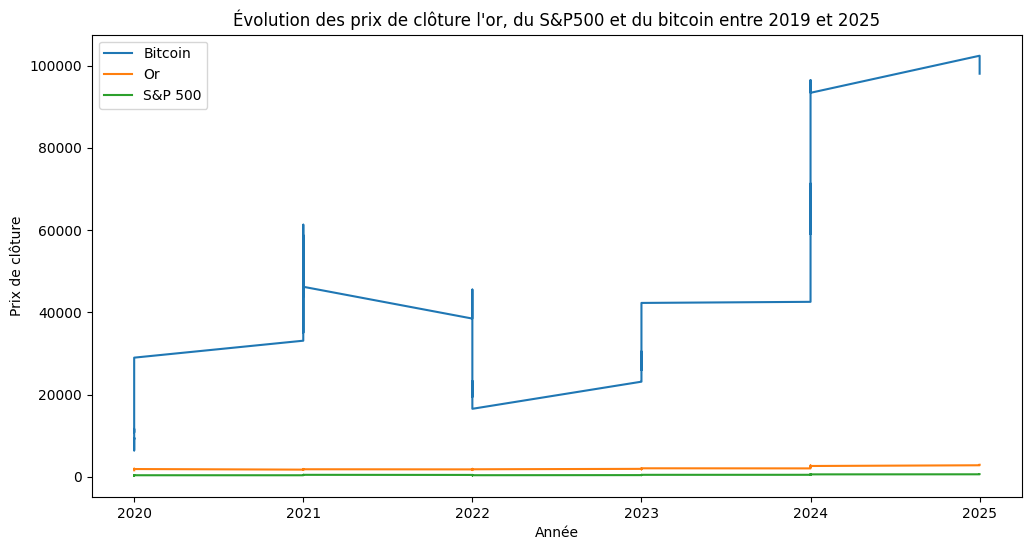

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

for actif in df_total['Actif'].unique():
    subset = df_total[df_total['Actif'] == actif]
    plt.plot(subset['Année'], subset['Clôture'], label=actif)

plt.legend()
plt.title("Évolution des prix de clôture l'or, du S&P500 et du bitcoin entre 2019 et 2025")
plt.xlabel("Année")
plt.ylabel("Prix de clôture")
plt.show()

      Actif  Année  Rendement
0   Bitcoin   2020        NaN
1   Bitcoin   2020  -0.088217
2   Bitcoin   2020  -0.247821
3   Bitcoin   2020   0.344615
4   Bitcoin   2020   0.095690
..      ...    ...        ...
57  S&P 500   2024  -0.008924
58  S&P 500   2024   0.059634
59  S&P 500   2024  -0.027334
60  S&P 500   2025   0.026856
61  S&P 500   2025   0.005035

[179 rows x 3 columns]


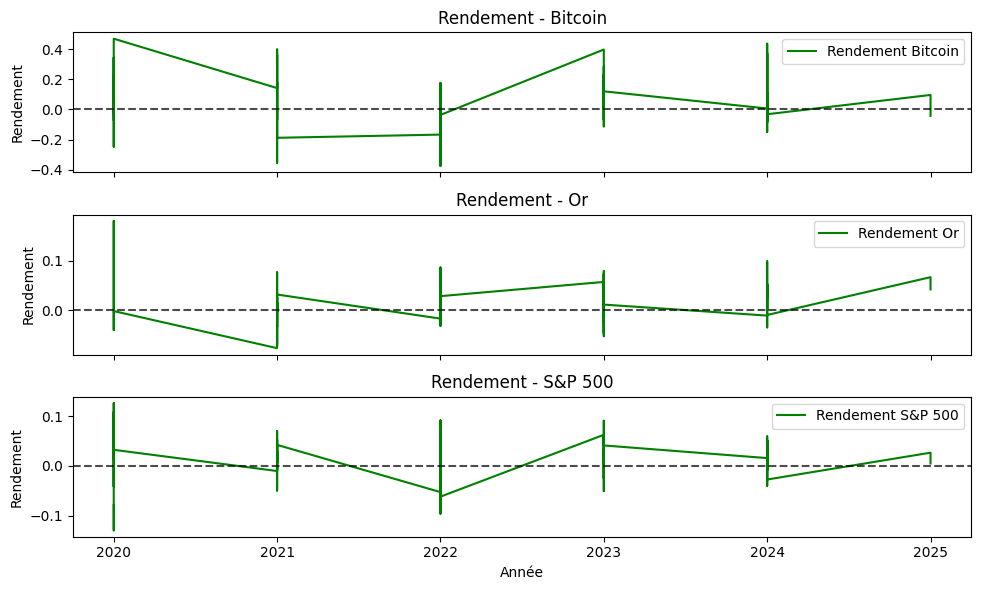

In [69]:
#(Prix de vente - prix d'achat)/prix d'achat
#Méthode .pct_change()

# Conversion en numérique
df_total['Clôture'] = pd.to_numeric(df_total['Clôture'], errors='coerce')

# Calcul du rendement
df_total['Rendement'] = df_total.groupby('Actif')['Clôture'].pct_change()

#Rendement quotidien sous forme de tableau
print(df_total[['Actif', 'Année', 'Rendement']])

df_total['Rendement'] = df_total.groupby('Actif')['Clôture'].pct_change()

# Création des sous-graphes (1 par actif)
fig, axes = plt.subplots(len(df_total['Actif'].unique()), 1, figsize=(10, 6), sharex=True)

for ax, actif in zip(axes, df_total['Actif'].unique()):
    subset = df_total[df_total['Actif'] == actif]
    ax.plot(subset['Année'], subset['Rendement'], label=f'Rendement {actif}', color='green')

    ax.set_title(f'Rendement - {actif}')
    ax.axhline(0, linestyle='--', color='black', alpha=0.7)  # Ligne zéro pour repère
    ax.legend()
    ax.set_ylabel('Rendement')

plt.xlabel('Année')
plt.tight_layout()
plt.show()


Nouvelles valeurs à calculer

In [ ]:
#Check des valeurs déjà présentes
print(df_total.head())  
print(df_total.columns)  


   Année  Mois  Ouverture        Haut        Bas    Clôture   Volume    Actif  \
0   2020     1  7190.6005   9574.4994  6870.7240  9350.8328  2343316  Bitcoin   
1   2020     2  9350.4719  10503.1782  8440.7014  8525.9295  2318820  Bitcoin   
2   2020     3  8527.1303   9195.2664  3836.9059  6413.0223  5955546  Bitcoin   
3   2020     4  6415.3477   9461.1138  6153.4737  8623.0469  3525791  Bitcoin   
4   2020     5  8621.6808  10067.3335  8125.3912  9448.1873  3749452  Bitcoin   

   Rendement  
0        NaN  
1  -0.088217  
2  -0.247821  
3   0.344615  
4   0.095690  
Index(['Année', 'Mois', 'Ouverture', 'Haut', 'Bas', 'Clôture', 'Volume',
       'Actif', 'Rendement'],
      dtype='object')


In [80]:
#Calcul de la volatilité
df_total['Volatilité'] = df_total.groupby('Actif')['Rendement'].rolling(window=14).std().reset_index(level=0, drop=True)


# Calcul du RSI (avec une bonne gestion du groupby)
def compute_rsi(series, window=14):
    delta = series.diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    avg_gain = gain.rolling(window=window, min_periods=1).mean()
    avg_loss = loss.rolling(window=window, min_periods=1).mean()
    
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    
    return rsi

# Appliquer la fonction par groupe
df_total['RSI'] = df_total.groupby('Actif')['Clôture'].transform(compute_rsi)


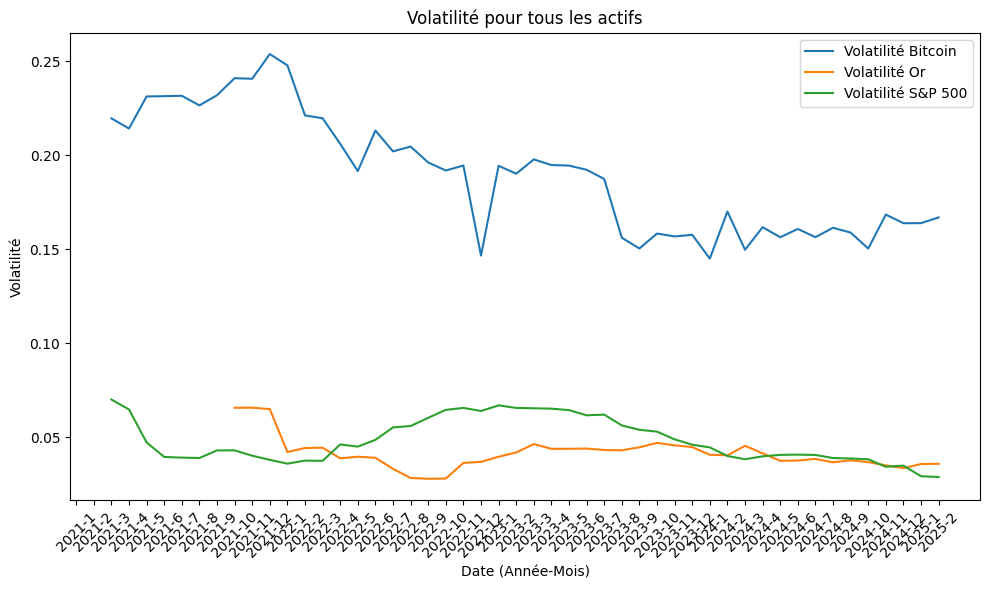

In [78]:
# Création du graphique pour la volatilité
plt.figure(figsize=(10, 6))

# Tracer la volatilité pour chaque actif
for actif_a_afficher in df_total["Actif"].unique():
    subset = df_total[df_total["Actif"] == actif_a_afficher]
    plt.plot(subset["Année"].astype(str) + "-" + subset["Mois"].astype(str), subset["Volatilité"], label=f"Volatilité {actif_a_afficher}")

# Personnalisation du graphique
plt.title("Volatilité pour tous les actifs")
plt.xlabel("Date (Année-Mois)")
plt.ylabel("Volatilité")
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()


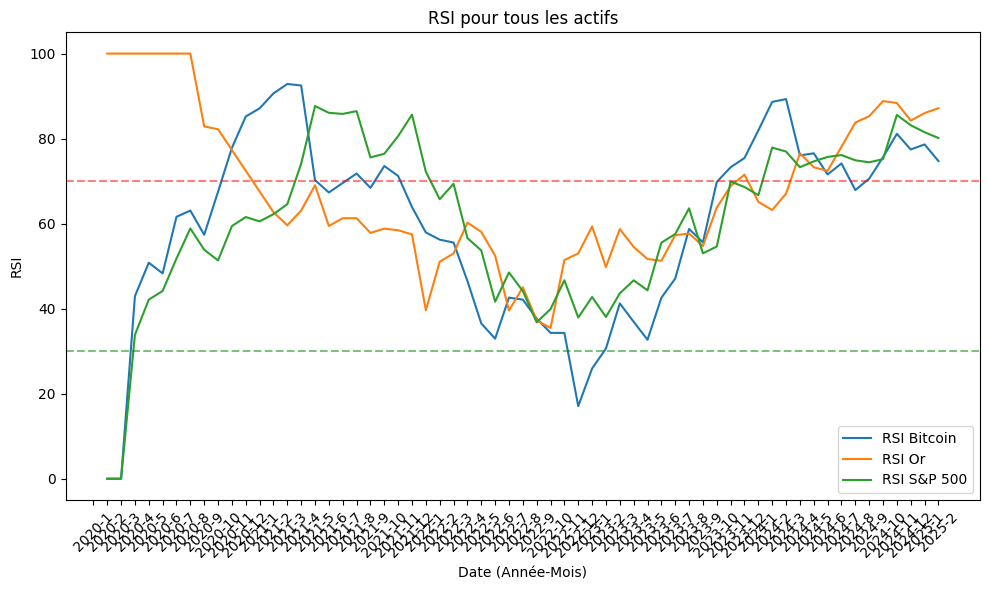

In [77]:
# Création du graphique avec "Année" et "Mois"
plt.figure(figsize=(10, 6))

# Tracer le RSI pour chaque actif
for actif_a_afficher in df_total["Actif"].unique():
    subset = df_total[df_total["Actif"] == actif_a_afficher]
    plt.plot(subset["Année"].astype(str) + "-" + subset["Mois"].astype(str), subset["RSI"], label=f"RSI {actif_a_afficher}")

# Ajouter les lignes de surachat et survente
plt.axhline(70, linestyle="--", color="red", alpha=0.5)  # Surachat
plt.axhline(30, linestyle="--", color="green", alpha=0.5)  # Survente

# Personnalisation du graphique
plt.title("RSI pour tous les actifs")
plt.xlabel("Date (Année-Mois)")
plt.ylabel("RSI")
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()


Machine learning - Prédiction du prix de clôture pour l'or

Evolution du cours de l'or actuellement

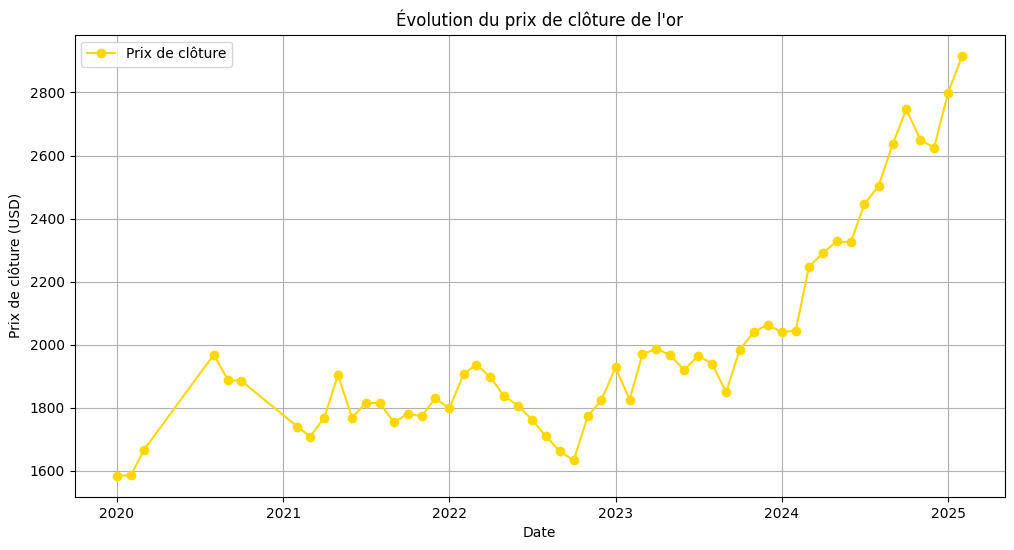

In [51]:
# Charger les données de l'or
gold = pd.read_csv("Or_5_ans_par_mois.csv")

# Vérifier le format de la colonne 'Année' et 'Mois' pour créer une date
gold["Date"] = pd.to_datetime(gold["Année"].astype(str) + "-" + gold["Mois"].astype(str))

# Tracer l'évolution du prix de clôture
plt.figure(figsize=(12,6))
plt.plot(gold["Date"], gold["Clôture"], marker='o', linestyle='-', color='gold', label="Prix de clôture")

# Personnalisation du graphique
plt.xlabel("Date")
plt.ylabel("Prix de clôture (USD)")
plt.title("Évolution du prix de clôture de l'or")
plt.legend()
plt.grid(True)

plt.show()


Importation des librairies

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

Sélection des colonnes de caractéristiques et de la target

In [82]:
#Séparation des données par actif (Bitcoin, Or, S&P 500)
bitcoin_data = df_total[df_total['Actif'] == 'Bitcoin']
gold_data = df_total[df_total['Actif'] == 'Or']
sp500_data = df_total[df_total['Actif'] == 'S&P 500']

X_gold = gold_data[['Ouverture', 'Haut', 'Bas', 'RSI', 'Volatilité']]  # Variables indépendantes
y_gold = gold_data['Clôture']  # Variable cible

#Supression des données NaN car non gérées par le modèle
df_cleaned = df.dropna()

Diviser les données en test et train

In [83]:
X_train_gold, X_test_gold, y_train_gold, y_test_gold = train_test_split(X,y, test_size=0.2, random_state=42)

Choix du modèle et entraînement 

In [84]:
model_gold = LinearRegression()
model_gold.fit(X_train_gold, y_train_gold)

#Prédiction sur l'ensemble de test
y_pred = model_gold.predict(X_test_gold)

Prédictions du modèle

In [85]:
y_pred_gold = model_gold.predict(X_test_gold)

Validation croisée

In [86]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model_gold, X, y, cv=5, scoring='neg_mean_squared_error')
print(f"Scores de validation croisée : {scores}")
print(f"RMSE moyen : {np.mean(np.sqrt(-scores))}")


Scores de validation croisée : [-2.56076440e+07 -1.36622859e+08 -7.20784747e+04 -2.11353911e+04
 -6.33284504e+02]
RMSE moyen : 3437.5994741034606


Visualisation des prédictions par rapport aux données réelles

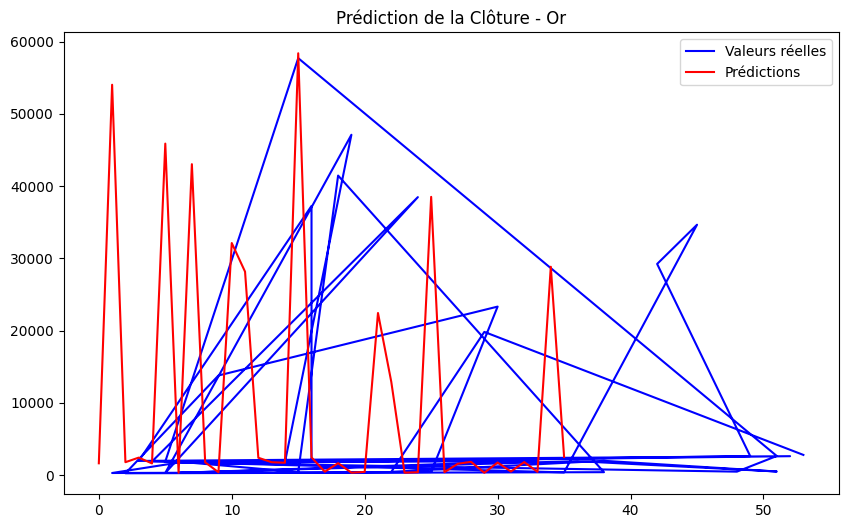

In [87]:
#Visualisation des résultats
plt.figure(figsize=(10, 6))
plt.plot(y_test_gold.index, y_test_gold, label='Valeurs réelles', color='blue')
plt.plot(y_pred_gold, label='Prédictions', color='red')
plt.title('Prédiction de la Clôture - Or')
plt.legend()
plt.show()

Evaluation du modèle avec RMSE

In [88]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Calculer l'RMSE
y_pred = model_gold.predict(X_test_gold)  # Prédictions du modèle sur les données de test
rmse = np.sqrt(mean_squared_error(y_test_gold, y_pred_gold))
print(f"RMSE : {rmse}")


RMSE : 3349.0163032252926


Modèle trop imprécis > il faut rajouter des données plus parlantes